# Data Proprocessing
In this notebook you will learn about data preprocessing

In [8]:
import pandas as pd
import os

### Data Cleaning
The purpose of cleaning data is to remove unwanted observations, fix structure errors, remove outliers, and handle missing data.

- Handling missing data
- Noise identification
- Inconsistency Correction 

In [38]:
df = pd.read_csv('../datasets/titanic.csv')
categorical = [col for col in df.columns if df[col].dtype == 'object']
numerical = [col for col in df.columns if df[col].dtype != 'object']
# print(f"Categorical columns: {categorical}\nNumerical columns: {numerical}")
# print(df[categorical].nunique())
# print(df[numerical].nunique())

In [40]:
# drop values
df_dropped = df.drop(columns=['Name', 'Ticket'])
df_dropped.shape

(891, 10)

### Data Transformation
- Standardization
- Normalization
- Feature Scaling

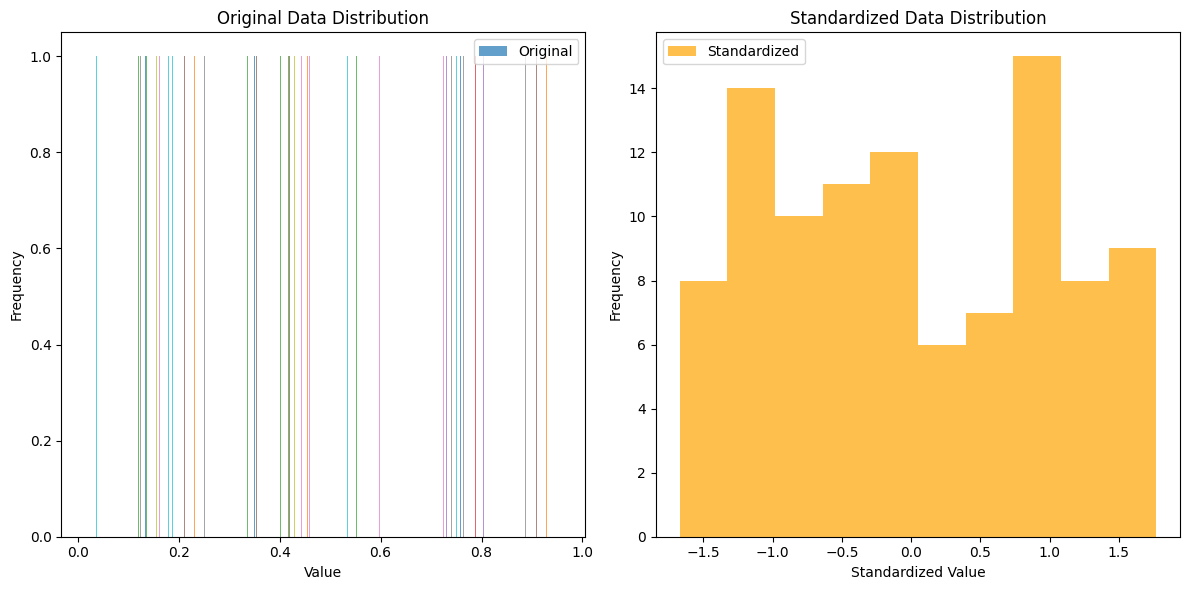

In [139]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# ----------------------
# ----------------------
# Standardization
# ----------------------
# ----------------------

# Definition:

# - Centers data around the mean and rescales to a standard deviations of 1
# - Less sensitive to outliers
# - Changes the shape of the orignal distribution
# - Preserves the relationships between the data

# Purpose:

# Formula:
# Z = (X - Mean) / Standard Deviation

# vals = np.array([38, 20, 32, 28, 21, 40, 33, 24])
vals = np.random.rand(1,100)

# ----------------------
# NumPy Implementation
# ----------------------

# Add ddof for the sample standard deviation (this parameter divides the samples by N - 1 instead of N)
# Bessel's Correction
mean = np.mean(vals)
std = np.std(vals, ddof=0)
standardized_vals = [(i - mean) / std for i in vals]

# print(f"Mean: {mean}\nStd: {std}\n")
# print(f"Original Values: {vals}\nStandardized Values: {np.round(standardized_vals, 2)}")

# ----------------------
# SciKit Implementation
# ----------------------

# Note
# SciKit learn does not implmement Bessel's Correction thus resulting in a smaller standard deviation
from sklearn.preprocessing import StandardScaler

vals_reshaped = vals.reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(vals_reshaped)
vals_scaled = scaler.transform(vals_reshaped)

# print(vals_scaled)

plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
plt.hist(vals, bins=10, alpha=0.7, label='Original')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Original Data Distribution')
plt.legend()

# Standardized data histogram
plt.subplot(1, 2, 2)
plt.hist(vals_scaled.flatten(), bins=10, alpha=0.7, color='orange', label='Standardized')
plt.xlabel('Standardized Value')
plt.ylabel('Frequency')
plt.title('Standardized Data Distribution')
plt.legend()

plt.tight_layout()
plt.show()

NumPy: [0.9  0.   0.6  0.4  0.05 1.   0.65 0.2 ]

SciKit: [[0.9 ]
 [0.  ]
 [0.6 ]
 [0.4 ]
 [0.05]
 [1.  ]
 [0.65]
 [0.2 ]]


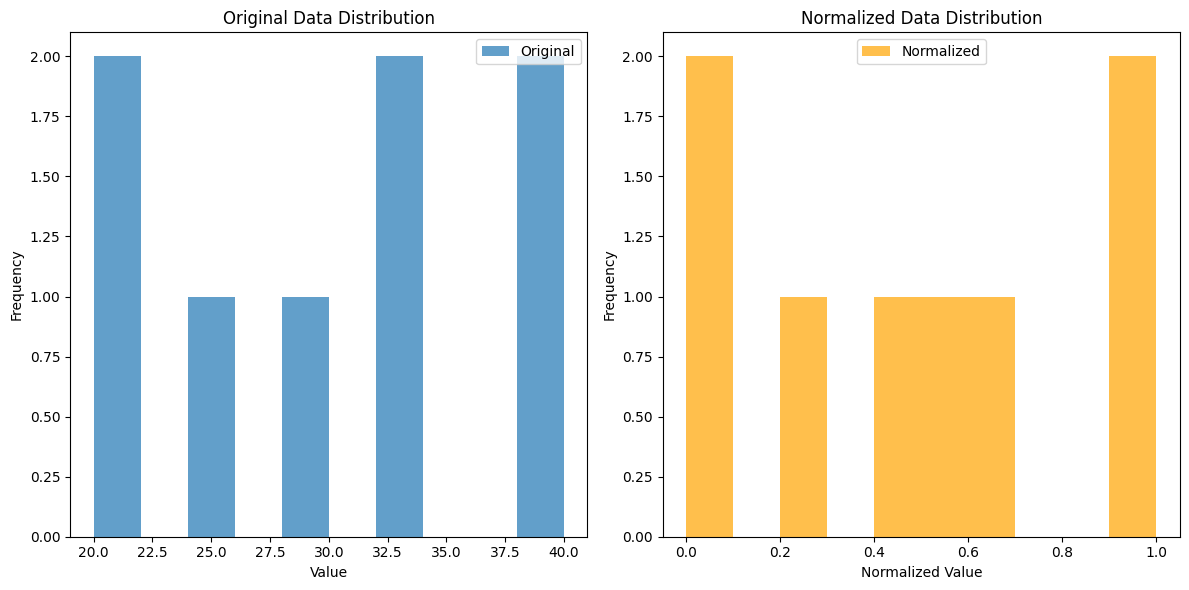

In [175]:
# ----------------------
# ----------------------
# Normalization
# ----------------------
# ----------------------

# Definition:

# - Rescales values between a range of 0 to 1
# - Sensitive to outliers
# - Retains the shape of the original data
# - May not preserve the relationship between the data points

# Purpose:

# Formula:
# X = (X - X-min) / (X-max - X-min)

vals = np.array([38, 20, 32, 28, 21, 40, 33, 24])
vals_reshaped = vals.reshape(-1, 1)

# ----------------------
# NumPy Implementation
# ----------------------
import numpy as np

max_val = np.max(vals)
min_val = np.min(vals)
normalized_vals_numpy = (vals - min_val) / (max_val - min_val)
print(f"NumPy: {normalized_vals_numpy}\n")

# ----------------------
# SciKit Implementation
# ----------------------
from sklearn.preprocessing import MinMaxScaler

vals_reshaped = vals.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(vals_reshaped)
scaled_vals = scaler.transform(vals_reshaped)
print(f"SciKit: {scaled_vals}")

plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
plt.hist(vals, bins=10, alpha=0.7, label='Original')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Original Data Distribution')
plt.legend()

# Standardized data histogram
plt.subplot(1, 2, 2)
plt.hist(normalized_vals, bins=10, alpha=0.7, color='orange', label='Normalized')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.title('Normalized Data Distribution')
plt.legend()

plt.tight_layout()
plt.show()

### Data Reduction
- Dimensionality Reduction
- Binning
- Aggregation

### Data Integration
- Merging data from multiple sources
- Entity identification problem

### Feature Engineering
- Feature Creation
- Feature Extraction
- Feature Selection

### Data Discretization
- Binarization
- Histograms

### Data Encoding
- One-Hot Encoding
- Label Encoding
- Ordinal Encoding

### Handling Imbalanced Data:
- Oversampling
- Undersampling
- Synthetic Data Generation

### Image Preprocessing
- Resizing and Rescaling
- Image Augmentation
- Color Space Conversion

### Time Series Preprocessing
- Sequence Padding
- Windowing
- Differencing